## Imports

In [19]:
from collections import Counter 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [20]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


## Reading and first look @ dataset

In [21]:
df = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Movies vs TV shows

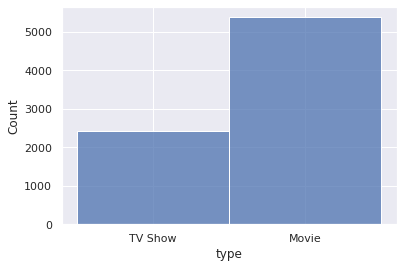

Movie      5377
TV Show    2410
Name: type, dtype: int64


In [22]:
sns.histplot(df['type'])
plt.show()
print(df['type'].value_counts())

## Movies by duration

In [23]:
movies = df.loc[df['type'] == "Movie"]
duration = np.array([int(i.split(' ')[0])for i in movies.duration.dropna()])
print("Films are in average ",duration.mean(), "mins long","+- ",np.std(duration),"mins")
print("Median is",np.median(duration), "mins")
print("Shortest film is ", duration.min(), "mins and the longest is ", duration.max(), "mins")
#plt.plot(movies.duration,movies.duration.count())

Films are in average  99.30797842663195 mins long +-  28.52822761450318 mins
Median is 98.0 mins
Shortest film is  3 mins and the longest is  312 mins


## TV shows by duration

In [24]:
tv = df.loc[df['type'] == "TV Show"]
duration = np.array([int(i.split(' ')[0])for i in tv.duration.dropna()])

print("TV shows are in average ",duration.mean(), "seasons long","+- ",np.std(duration), "seasons")
print("Median is",np.median(duration), "mins")
print("Shortest TV series is ", duration.min(), "seasons (Expected) and the longest is ", duration.max(), "seasons")
#plt.plot(movies.duration,movies.duration.count())

TV shows are in average  1.7759336099585061 seasons long +-  1.5960277648893695 seasons
Median is 1.0 mins
Shortest TV series is  1 seasons (Expected) and the longest is  16 seasons


## And now by country

### Movies

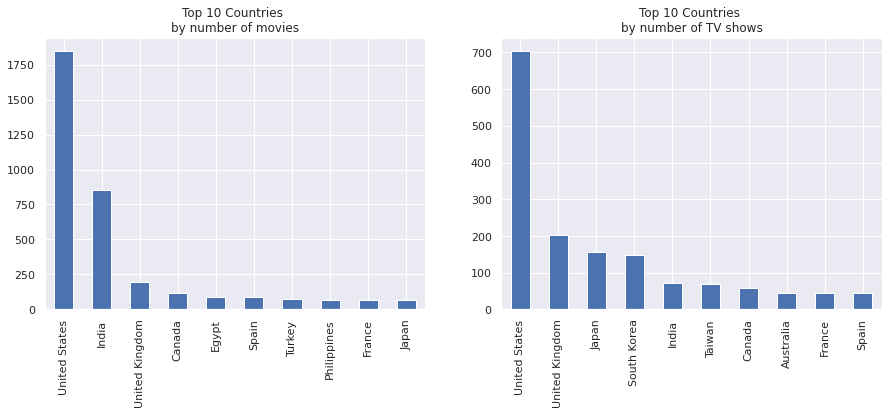

Movies:
United States     1850
India              852
United Kingdom     193
Canada             118
Egypt               89
Spain               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: country, dtype: int64

------------------------------

TV shows:
United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Taiwan             68
Canada             59
Australia          46
France             46
Spain              45
Name: country, dtype: int64


In [25]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
movies['country'].value_counts()[:10].plot(kind='bar',title="Top 10 Countries \nby number of movies",ax=axs[0])
tv['country'].value_counts()[:10].plot(kind='bar',title="Top 10 Countries \nby number of TV shows",ax=axs[1])
plt.show()
print("Movies:")
print(movies['country'].value_counts().head(10))
print("\n"+"------------------------------"+"\n")
print("TV shows:")
print(tv['country'].value_counts().head(10))

## Taking a look at actors and directors

In [34]:
cast = Counter(', '.join(df.cast.dropna()).split(', '))
print("Top 50 most frequent actors alongside frequency:\n")
for tup in cast.most_common(50):
    print(tup[0], ':',tup[1])

Top 50 most frequent actors alongside frequency:

Anupam Kher : 42
Shah Rukh Khan : 35
Naseeruddin Shah : 30
Om Puri : 30
Takahiro Sakurai : 29
Akshay Kumar : 29
Boman Irani : 27
Amitabh Bachchan : 27
Paresh Rawal : 27
Yuki Kaji : 27
Kareena Kapoor : 25
John Cleese : 24
Vincent Tong : 24
Andrea Libman : 24
Tara Strong : 22
Ashleigh Ball : 22
Ajay Devgn : 21
Nawazuddin Siddiqui : 21
Samuel L. Jackson : 20
Kay Kay Menon : 20
Salman Khan : 20
Daisuke Ono : 20
Nicolas Cage : 20
Fred Tatasciore : 19
Gulshan Grover : 19
Adam Sandler : 19
Erin Fitzgerald : 18
Ai Kayano : 18
Yashpal Sharma : 18
David Attenborough : 18
Anil Kapoor : 18
Debi Derryberry : 18
Kana Hanazawa : 18
James Franco : 18
Junichi Suwabe : 18
Jackie Shroff : 17
Priyanka Chopra : 17
Saif Ali Khan : 17
Fred Armisen : 17
Kate Higgins : 17
Diana Kaarina : 17
Asrani : 17
Laura Bailey : 17
Danny Trejo : 16
Aamir Khan : 16
Morgan Freeman : 16
Seth Rogen : 16
Michela Luci : 16
Rajpal Yadav : 16
Antonio Banderas : 16


In [35]:
directors = Counter(', '.join(df.director.dropna()).split(', '))
print("Top 50 most frequent directors alongside frequency:\n")
for tup in directors.most_common(50):
    print(tup[0],':',tup[1])

Top 50 most frequent directors alongside frequency:

Jan Suter : 21
Raúl Campos : 19
Marcus Raboy : 16
Jay Karas : 15
Cathy Garcia-Molina : 13
Youssef Chahine : 12
Martin Scorsese : 12
Jay Chapman : 12
Steven Spielberg : 10
Shannon Hartman : 9
Anurag Kashyap : 9
David Dhawan : 9
Kunle Afolayan : 8
Justin G. Dyck : 8
Umesh Mehra : 8
Hakan Algül : 8
Ryan Polito : 8
Johnnie To : 8
Lance Bangs : 8
Quentin Tarantino : 8
Yılmaz Erdoğan : 8
Robert Rodriguez : 8
Ozan Açıktan : 7
McG : 7
S.S. Rajamouli : 7
Omoni Oboli : 7
Dibakar Banerjee : 7
Don Michael Paul : 7
Noah Baumbach : 7
Fernando Ayllón : 7
Leslie Small : 7
Hanung Bramantyo : 7
Ram Gopal Varma : 6
Rajkumar Santoshi : 6
Ron Howard : 6
Jesse V. Johnson : 6
William Lau : 6
Wenn V. Deramas : 6
Priyadarshan : 6
Karan Johar : 6
Zoya Akhtar : 6
Troy Miller : 6
Vlad Yudin : 6
Wong Jing : 6
Kevin Smith : 6
Anees Bazmee : 6
Joey So : 6
Riri Riza : 6
Sameh Abdulaziz : 6
Michael Simon : 6


## Listed_in using Counter as well

In [31]:
categ = Counter(', '.join(df.listed_in.dropna()).split(', '))
print("Top 50 most categories alongside frequency:\n")
for tup in categ.most_common(50):
    print(tup[0],':',tup[1],'or','%.3f'%(100*tup[1]/7787),'%')

Top 50 most categories alongside frequency:

International Movies : 2437 or 31.296 %
Dramas : 2106 or 27.045 %
Comedies : 1471 or 18.890 %
International TV Shows : 1199 or 15.397 %
Documentaries : 786 or 10.094 %
Action & Adventure : 721 or 9.259 %
TV Dramas : 704 or 9.041 %
Independent Movies : 673 or 8.643 %
Children & Family Movies : 532 or 6.832 %
Romantic Movies : 531 or 6.819 %
TV Comedies : 525 or 6.742 %
Thrillers : 491 or 6.305 %
Crime TV Shows : 427 or 5.483 %
Kids' TV : 414 or 5.317 %
Docuseries : 353 or 4.533 %
Romantic TV Shows : 333 or 4.276 %
Stand-Up Comedy : 329 or 4.225 %
Music & Musicals : 321 or 4.122 %
Horror Movies : 312 or 4.007 %
British TV Shows : 232 or 2.979 %
Reality TV : 222 or 2.851 %
Sci-Fi & Fantasy : 218 or 2.800 %
Sports Movies : 196 or 2.517 %
Korean TV Shows : 150 or 1.926 %
TV Action & Adventure : 150 or 1.926 %
Anime Series : 148 or 1.901 %
Spanish-Language TV Shows : 147 or 1.888 %
Classic Movies : 103 or 1.323 %
TV Mysteries : 90 or 1.156 %
LGBTQ